# House price prediction system
## Name:Godfrey Maina
## course

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Checking for null values in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From the dataset we can see that most attributes have 20,640. 

But when it comes to tottal_bedrooms there are 20433 which means we have some null values 

In [5]:
data.dropna(inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Now we have data which dont have missing record as shown above

Now that we have cleaned our data, let us split the data into training and testing 

#### Converting categorical data 

In the ocean_proximity column, we have categorical data that computer does not understand and we have to convert it

In [7]:
pd.get_dummies(data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [8]:
data = data.join(pd.get_dummies(data.ocean_proximity))

In [9]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,False,True,False,False,False


since we have added the ocean proximity variable as column we have to drop that column to avoid redundancy

In [10]:
data = data.drop(['ocean_proximity'],axis=1)

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


#### Splitting data into trianing and testing

In [12]:
x =data.drop(['median_house_value'],axis= 1)
y = data['median_house_value']

In [13]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False


In [14]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [16]:
train_data = x_train.join(y_train)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
10462,-117.64,33.48,12.0,2007.0,397.0,1033.0,373.0,5.6754,True,False,False,False,False,275900.0
5485,-118.46,33.99,35.0,1214.0,300.0,478.0,265.0,4.0156,True,False,False,False,False,500001.0
15105,-117.01,32.83,17.0,15401.0,3280.0,7302.0,3176.0,3.3067,True,False,False,False,False,121900.0
4110,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,True,False,False,False,False,483800.0
7607,-118.26,33.88,39.0,1756.0,320.0,1055.0,322.0,3.2375,True,False,False,False,False,105200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,-117.37,34.10,44.0,2087.0,447.0,1270.0,423.0,2.3889,False,True,False,False,False,86100.0
11146,-117.98,33.84,33.0,2291.0,439.0,1187.0,405.0,3.9539,True,False,False,False,False,191100.0
6361,-117.97,34.13,33.0,2038.0,473.0,1546.0,469.0,3.4777,False,True,False,False,False,144500.0
1633,-122.22,37.88,20.0,95.0,13.0,31.0,15.0,2.4444,False,False,False,True,False,475000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

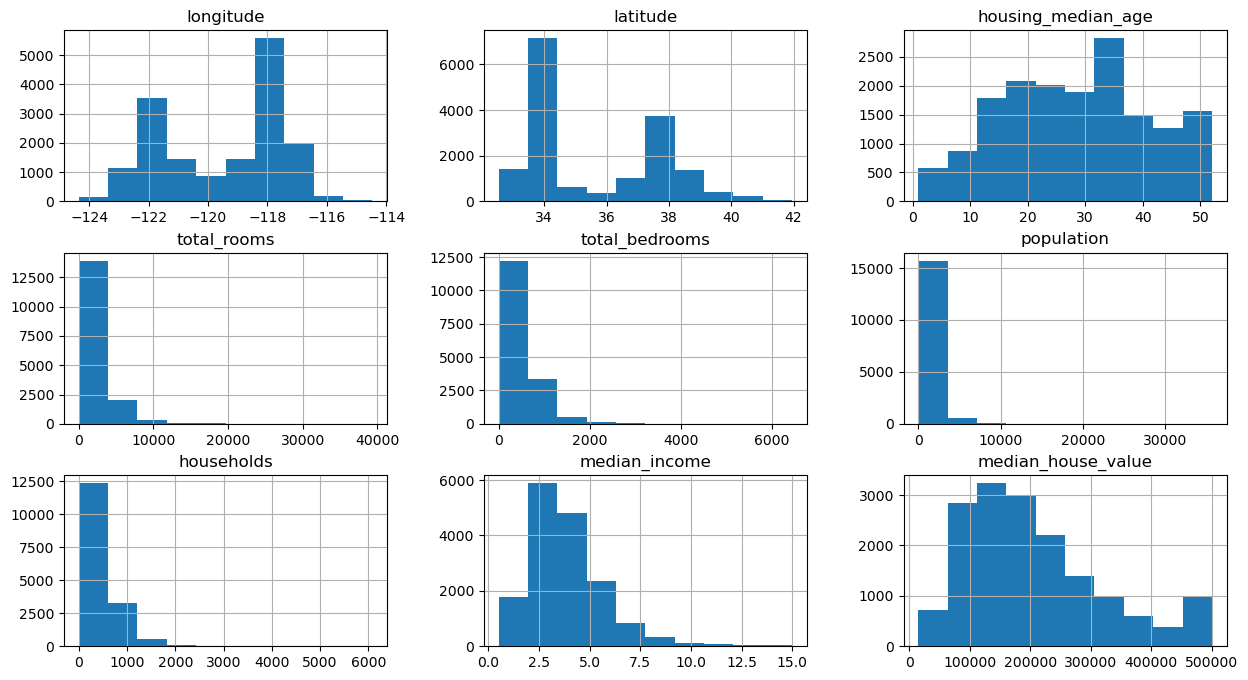

In [18]:
train_data.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

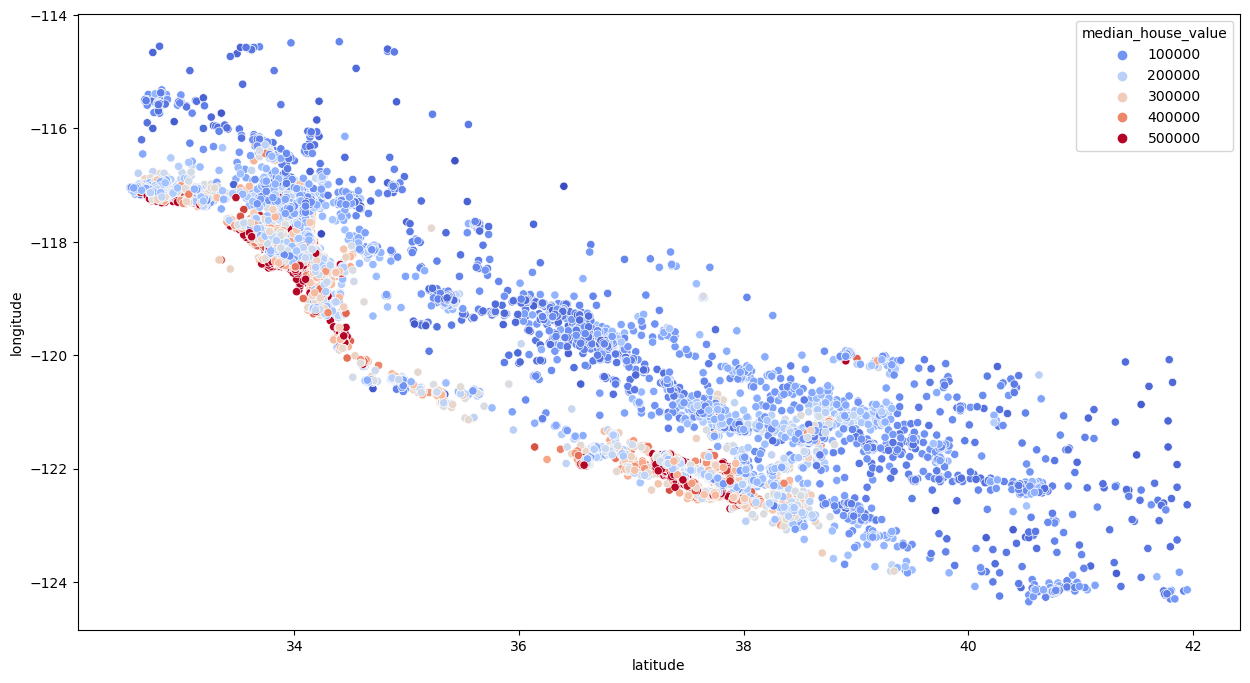

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data= train_data, hue ="median_house_value",palette = "coolwarm")

In [20]:
x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

In [21]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10462,-117.64,33.48,12.0,2007.0,397.0,1033.0,373.0,5.6754,True,False,False,False,False
5485,-118.46,33.99,35.0,1214.0,300.0,478.0,265.0,4.0156,True,False,False,False,False
15105,-117.01,32.83,17.0,15401.0,3280.0,7302.0,3176.0,3.3067,True,False,False,False,False
4110,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,True,False,False,False,False
7607,-118.26,33.88,39.0,1756.0,320.0,1055.0,322.0,3.2375,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,-117.37,34.10,44.0,2087.0,447.0,1270.0,423.0,2.3889,False,True,False,False,False
11146,-117.98,33.84,33.0,2291.0,439.0,1187.0,405.0,3.9539,True,False,False,False,False
6361,-117.97,34.13,33.0,2038.0,473.0,1546.0,469.0,3.4777,False,True,False,False,False
1633,-122.22,37.88,20.0,95.0,13.0,31.0,15.0,2.4444,False,False,False,True,False


In [22]:
y_train

10462    275900.0
5485     500001.0
15105    121900.0
4110     483800.0
7607     105200.0
           ...   
13480     86100.0
11146    191100.0
6361     144500.0
1633     475000.0
10396    222300.0
Name: median_house_value, Length: 16346, dtype: float64

In [23]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [24]:
reg.score(x_test,y_test)

0.6420063833037044

In the above model, the accuracy is 62% which is not that bad and also not a great score

## scaling the data to improve the model

In [25]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [26]:
reg.fit(x_train_s,y_train)

LinearRegression()

In [27]:
reg.score(x_test_s,y_test)

0.6420063833037047

Even after scaling the data there is only a slite change inthe model accuracy

## Try another algorithm

in the exampe below i tried using the random forest regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor


In [29]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
forest.score(x_test,y_test)

0.8122310829307491

Now the accuracy changed to 81%. this was a good accucy for the model and i settled with this model

In [33]:
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [34]:
forest.score(x_test_s,y_test)

0.8139563694694979

There is only a small change in the accuracy on the scaled data 